# Péndulo amortiguado forzado

$$ \frac{d^2 \theta}{dt^2} =\dfrac{-g}{l}sin(\theta)-\dfrac{b}{m}\dfrac{d\theta}{dt}+\dfrac{1}{ml}F(t)$$
$$ \frac{d^2 \theta}{dt^2} + 2\beta\dfrac{d\theta}{dt}+\omega_0^2 sin(\theta)=A \omega_0^2 cos(\omega_1 t) $$

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
import seaborn as sns
import matplotlib 
sns.set()

In [19]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [20]:
A=.2
omega1=2*np.pi
omega0=omega1*1.5
beta=omega0/4

#Con F0=Acos(omega1 t)

tiempo=np.linspace(0,10,2000)
def pendulo(var,t,A):
    theta=var[0]
    dtheta=var[1]
    return [dtheta,A*omega0**2*np.cos(omega1*t)-omega0**2*np.sin(theta)-2*beta*dtheta]

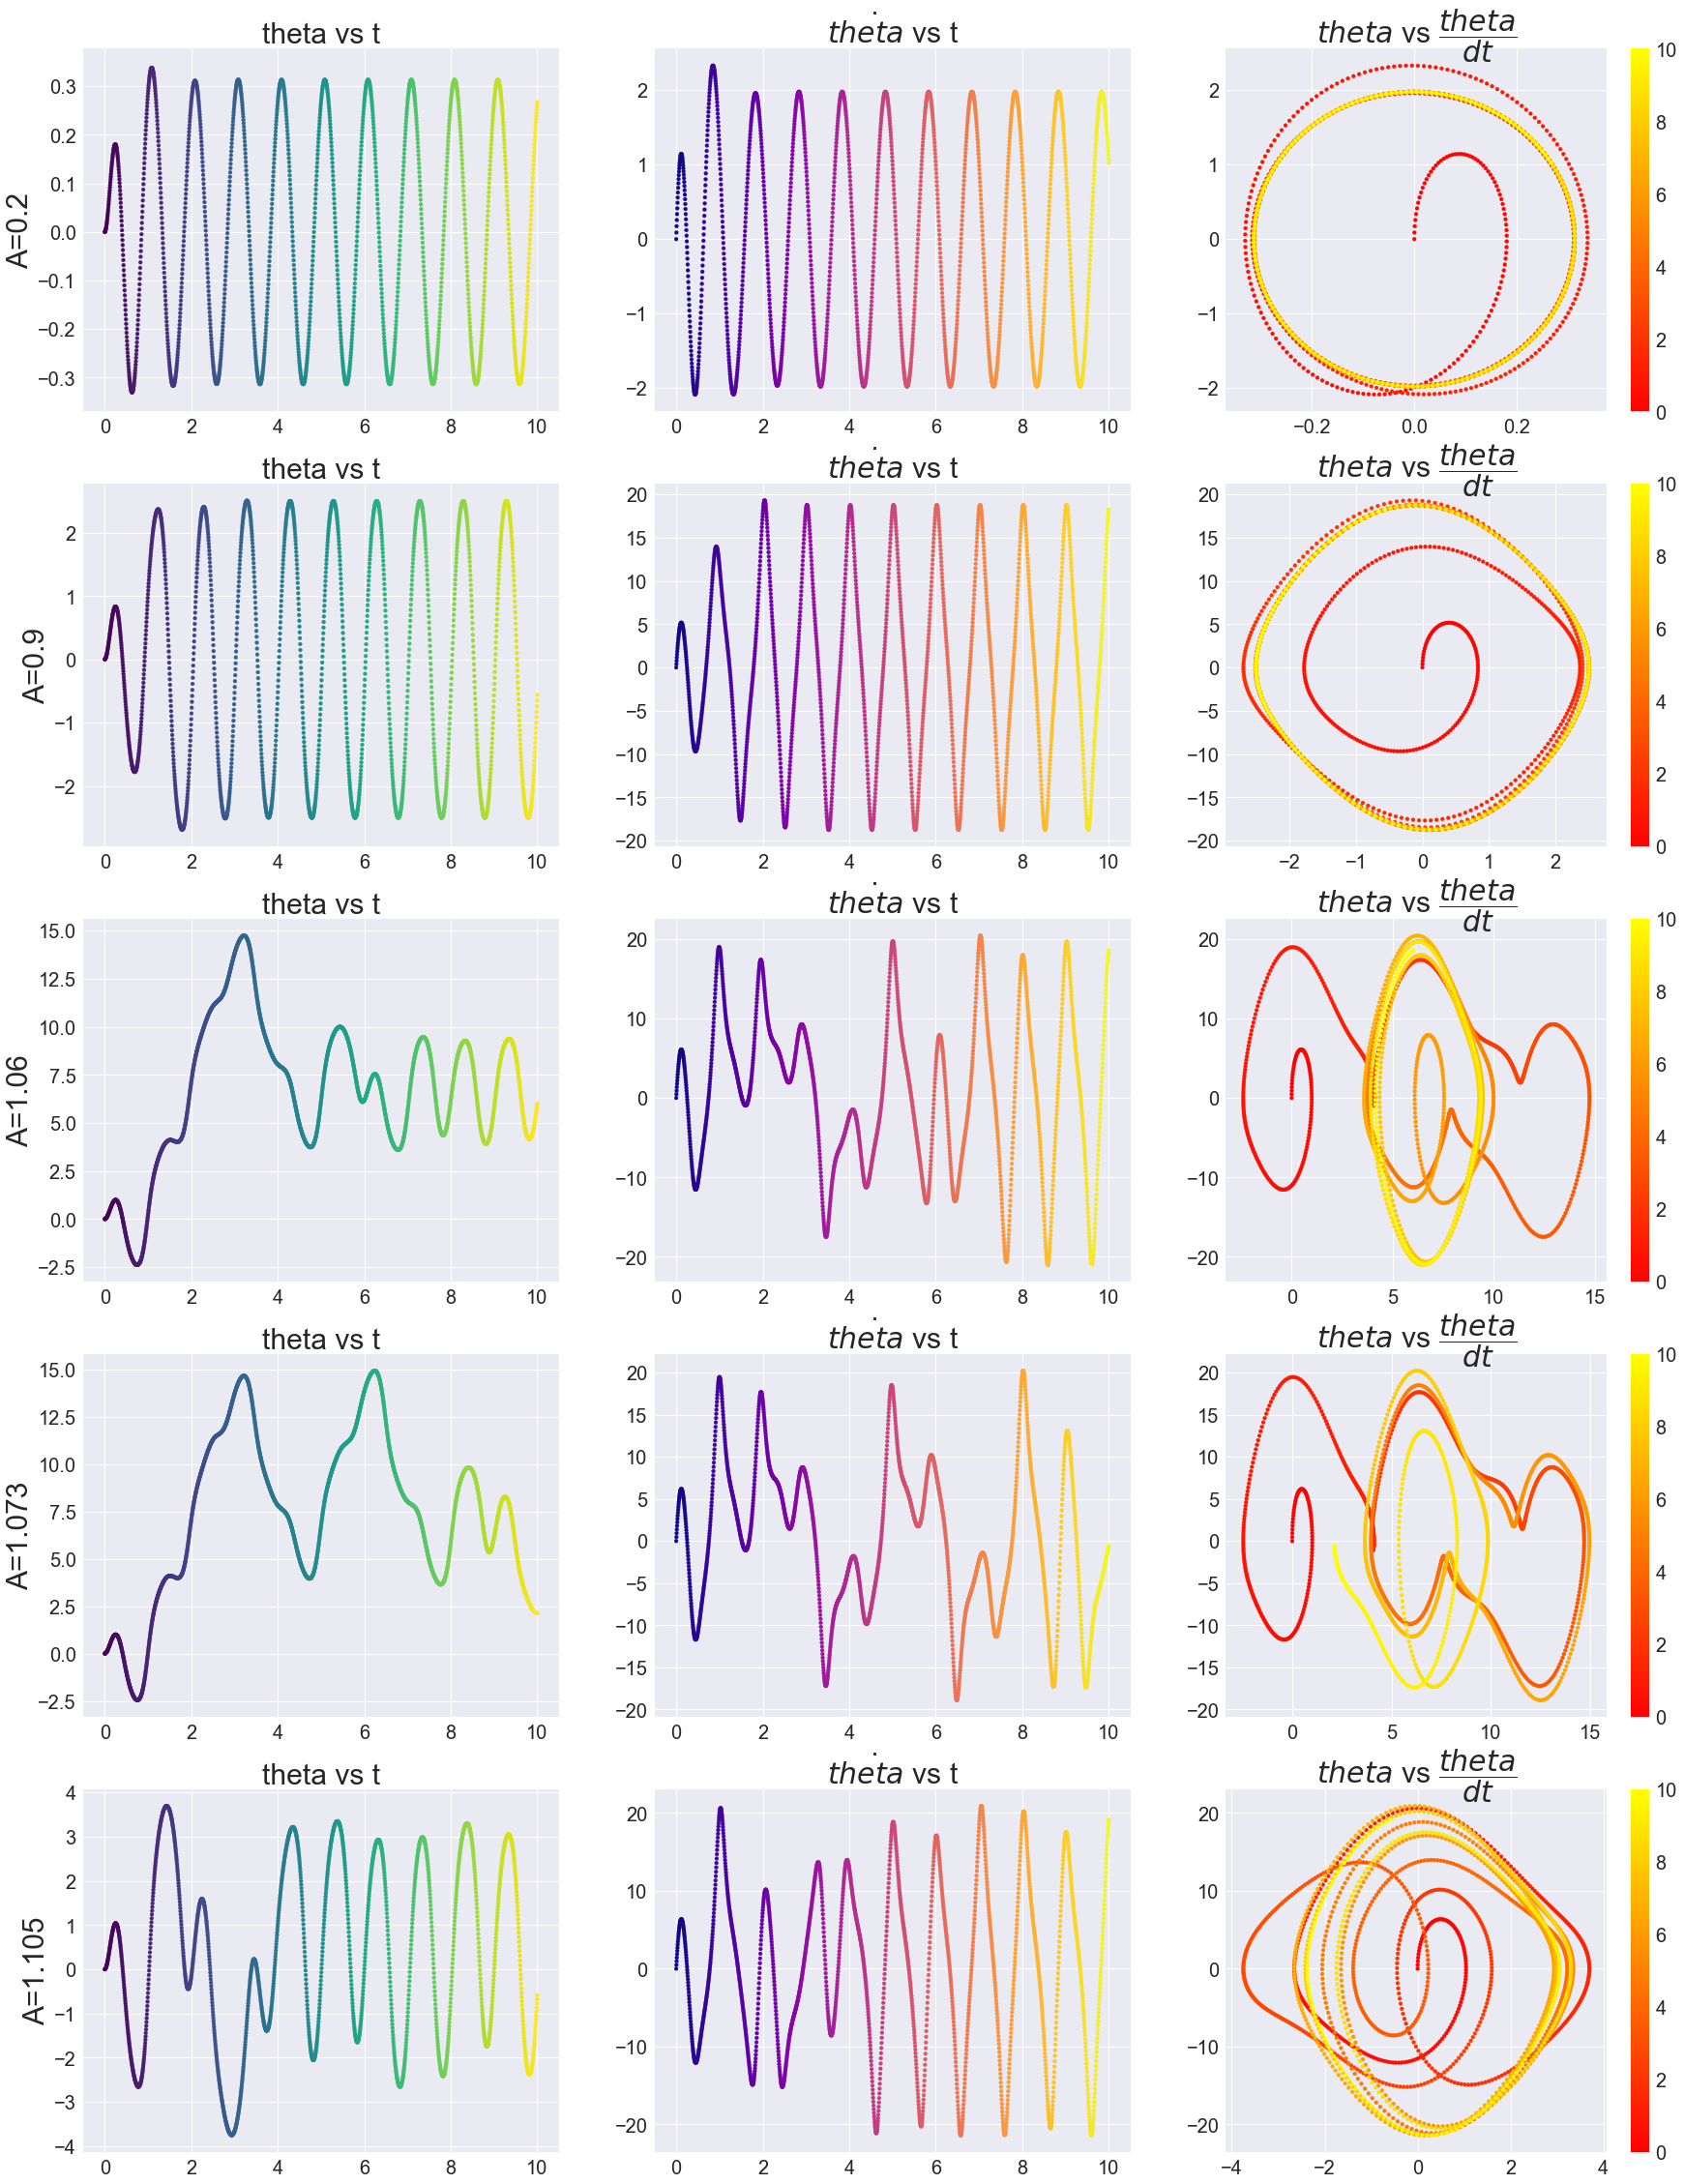

In [21]:
sol=odeint(pendulo,[np.pi*1.5,0],tiempo,args=(A,)).T

fig, axs = plt.subplots(5, 3,figsize=(30,40))   
As=[.2,.9,1.06,1.073,1.105]
for i in range(5):
    c=str(As[i])
    sol=odeint(pendulo,[0,0],tiempo,args=(As[i],)).T
    axs[i,0].scatter(tiempo,sol[0],s=15,c=tiempo,cmap='viridis')
    axs[i,0].set_ylabel('A={}'.format(c),fontsize=30)
    axs[i,0].set_title('theta vs t',fontsize=30)
    axs[i,1].scatter(tiempo,sol[1],s=15,c=tiempo,cmap='plasma')
    axs[i,1].set_title('$\dot{ theta}$ vs t',fontsize=30)
    axs3=axs[i,2].scatter(sol[0],sol[1],s=15,c=tiempo,cmap='autumn')
    fig.colorbar(axs3,ax=axs[i,2])
    axs[i,2].set_title('$ theta $ vs $\dfrac{theta}{dt}$',fontsize=30)

### Animacion con A=1.073

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


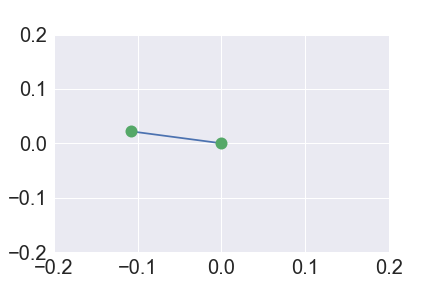

In [23]:
sol1=odeint(pendulo,[0,0],tiempo,args=(1.073,)).T
l=9.81/omega0**2
x1=l*np.sin(sol1[0])
y1=-l*np.cos(sol1[0])

fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.2), ylim=(-.2,.2))
#ax.plot((-1.5,1.5),(0,0))
linea, =ax.plot([0,x1[0]],[0,y1[0]])
pendulo1,=ax.plot([x1[0]],[y1[0]],'o',markersize=12)
def animate4(i):
    pendulo1.set_data([0,x1[i]],[0,y1[i]])
    return pendulo1,
def animate5(i):
    linea.set_data([0,x1[i]],[0,y1[i]])
    return linea,

anim = animation.FuncAnimation(fig,animate4,2000,interval=5)
anim2= animation.FuncAnimation(fig,animate5,2000,interval=5)
plt.show()

In [16]:
Posición=go.Scatter(x=tiempo,y=sol1[0],name='Angulo')
Fuerza=go.Scatter(x=tiempo,y=1.073*omega0**2*np.cos(omega1*tiempo),name='Fuerza')
Velocidad=go.Scatter(x=tiempo,y=sol1[1],name='Velocidad angular')
plotly.offline.iplot([Posición,Fuerza,Velocidad])

### Animacion con A=1.105

<IPython.core.display.Javascript object>


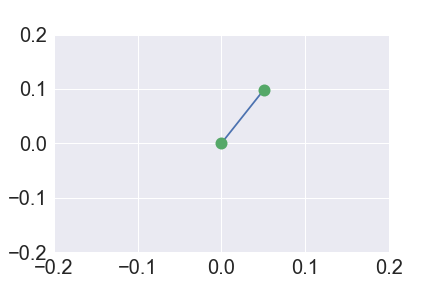

In [15]:
sol2=odeint(pendulo,[0,0],tiempo,args=(1.105,)).T
x2=l*np.sin(sol2[0])
y2=-l*np.cos(sol2[0])

fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.2), ylim=(-.2,.2))
#ax.plot((-1.5,1.5),(0,0))
linea, =ax.plot([0,x2[0]],[0,y2[0]])
pendulo2,=ax.plot([x2[0]],[y2[0]],'o',markersize=12)
def animate4(i):
    pendulo2.set_data([0,x2[i]],[0,y2[i]])
    return pendulo2,
def animate5(i):
    linea.set_data([0,x2[i]],[0,y2[i]])
    return linea,

anim = animation.FuncAnimation(fig,animate4,2000,interval=5)
anim2= animation.FuncAnimation(fig,animate5,2000,interval=5)
plt.show()